# Simple Linear Regression

In [6]:
# import basic libraries 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set(style='darkgrid') # Setting the style of seaborn plots to 'darkgrid', which adds a dark grid to the background of plots.

%matplotlib inline 
# This line should be used in Jupyter notebooks to display matplotlib plots inline (within the notebook).

In [9]:
# load the dataset 
original_data = pd.read_csv('../Data/Student_Marks.csv')

# make a copy of the original data ( make a deep copy)
model_data = original_data.copy()

# let us see the top 5 rows of the data 
model_data.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


## Description of the dataset columns 
>**number_courses** : Number of Courses Opted by the student<br/>
**time_study** : Average Time Studied per day by the student<br/>
**Marks** : Marks Obtained by the student

## Dropping a Columns
>Since I am performing a Simple Linear Regression on the above dataset, it is sufficient to have a single explanatory variable. Thus, I drop the `number_courses` column from the dataset.

In [10]:
# let us first see the names of the columns 
model_data.columns

Index(['number_courses', 'time_study', 'Marks'], dtype='object')

In [11]:
# let us drop the column - number_courses - fom the dataframe 
model_data.drop(
    labels = model_data.columns[0],
    axis = 1, 
    inplace = True
)

model_data.head()


,time_study,Marks
0,4.508,19.202
1,0.096,7.734
2,3.133,13.811
3,7.909,53.018
4,7.811,55.299


## Information about the dataset

In [12]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   time_study  100 non-null    float64
 1   Marks       100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


So, there are no null values to handle in the dataset. The dataset is clean!


In [15]:
# let us get info about the descriptive statistics of the variables 
model_data.describe().T

,count,mean,std,min,25%,50%,75%,max
time_study,100.0,4.07714,2.372914,0.096,2.0585,4.0220,6.17925,7.957
Marks,100.0,24.41769,14.326199,5.609,12.6330,20.0595,36.67625,55.299


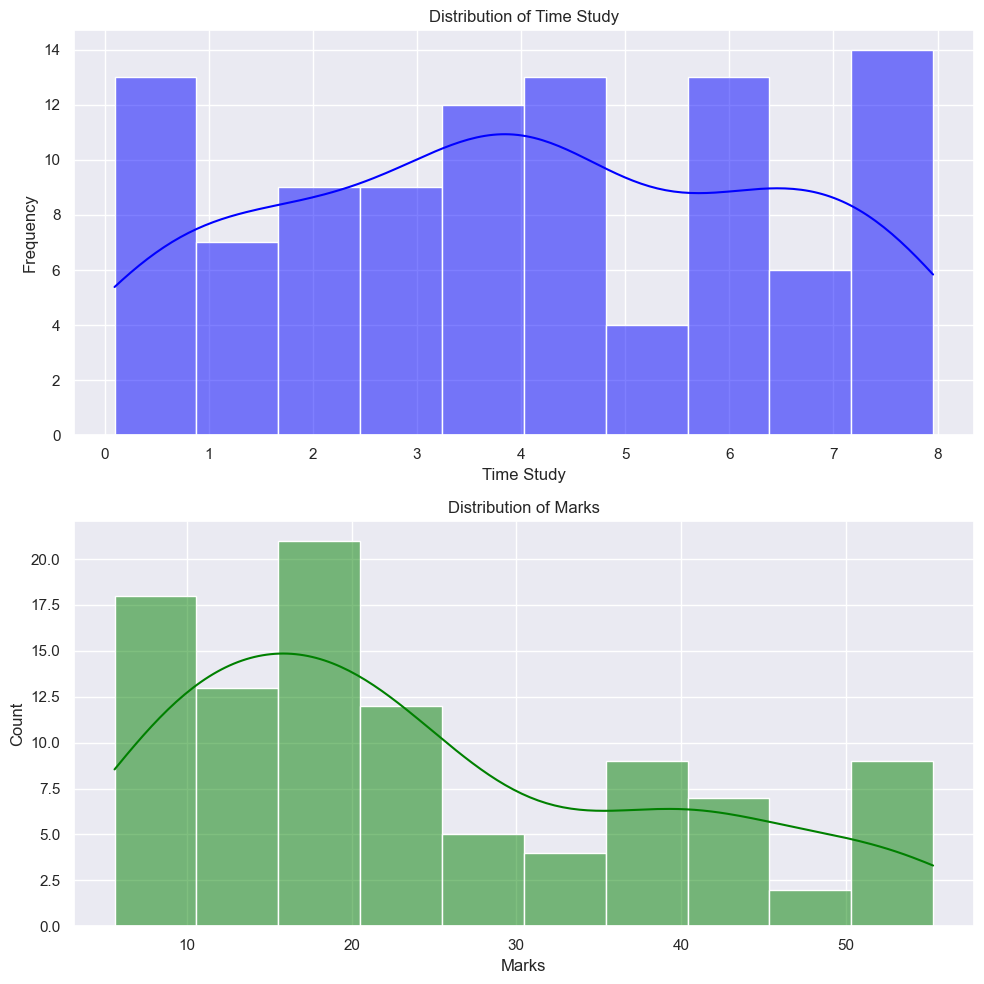

In [30]:
# let us plot the variables 
fig, axes = plt.subplots(2, 1, figsize=(10,10))

sns.histplot(model_data['time_study'], bins=10, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Distribution of Time Study')
axes[0].set_xlabel('Time Study')
axes[0].set_ylabel('Frequency')

# Plot histogram for "Marks"
sns.histplot(model_data['Marks'], bins=10, kde=True, ax=axes[1], color='green')
axes[1].set_title('Distribution of Marks')
axes[1].set_xlabel('Marks')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

Based on the histograms provided for the `time_study` and `Marks` distributions:

1. **Distribution of `time_study`**:
   - The data appears somewhat uniform, with no strong central peak or evident skew.
   - The KDE curve shows a slight increase in density around 3–5, suggesting that these values occur more frequently, but the distribution overall is fairly flat.
   - This might indicate that `time_study` values are spread out relatively evenly across the range.

2. **Distribution of `Marks`**:
   - The data shows a slight left skew, with higher frequencies observed in the lower range (e.g., 10–20).
   - The KDE curve highlights a peak around 15–20, suggesting that many students scored in this range, with the frequency tapering off as the marks increase.
   - This could indicate that most students performed modestly, with fewer high scorers.

### Insights:
- The `time_study` distribution does not appear to have a strong relationship with the shape of the `Marks` distribution at a glance, suggesting the need for further analysis, such as scatter plots or regression, to check for potential correlations or patterns.